# NGP: Validation Checks (FULL)

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import numpy as np
from astropy.table import Table
import itertools

import time


In [2]:
t0 = time.time()

catname = "../../dmu1/dmu1_ml_NGP/data/master_catalogue_ngp_20180219.fits"
master_catalogue = Table.read(catname)

print('Elapsed time(secs): ', time.time() - t0)

print("Number of sources in master catalogue: ", len(master_catalogue))

Elapsed time(secs):  78.66493129730225
Number of sources in master catalogue:  6759591


In [3]:
field = master_catalogue["field"][0]
field = field.rstrip()    # remove whitespaces at the end of the sting
print(field)

GAMA-12


In [4]:
field = "NGP"

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## 1/ Magnitude errors

In [6]:
u_bands = []
g_bands = [           "GPC1 g", "BASS g"]
r_bands = [           "GPC1 r", "BASS r"]
i_bands = [           "GPC1 i"]
z_bands = ["DECam z", "GPC1 z", "BASS z"]
y_bands = [           "GPC1 y",          "UKIDSS Y"]
J_bands = [                              "UKIDSS J"]
H_bands = [                              "UKIDSS H"]
K_bands = [                              "UKIDSS K"]

all_bands = [g_bands, r_bands, z_bands, y_bands]

irac_mags = []
other_mags = []

opt_mags = g_bands + r_bands + i_bands + z_bands + y_bands
ir_mags = J_bands + H_bands + K_bands + irac_mags
all_mags = opt_mags + ir_mags + other_mags

In [7]:
def mag_vs_err(x, y, fig, ax, labels=("x", "y"), savefig=False):

    x_label, y_label = labels
    print(x_label)

    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & (x!=99.) & (y!=99.)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
   
    if len(x) == 0:
        print("No sources have {} values.".format(x_label))
        print("")
        return
  
    #"""
    if len(x) > 0:
        print("    Error max: {:.0f}".format(np.max(y)))
        err10 = y > 10
        if len(x[err10]) > 0:
            print("    magerr > 10: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err10]), np.min(x[err10])))
        else:
            print("    magerr > 10: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err10]), np.nan))
        err100 = y > 100
        if len(x[err100]) > 0:
            print("    magerr > 100: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err100]), np.min(x[err100])))
        else:
            print("    magerr > 100: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err100]), np.nan))
        err1000 = y > 1000
        if len(x[err1000]) > 0:
            print("    magerr > 1000: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err1000]), np.min(x[err1000])))
        else:
            print("    magerr > 1000: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err1000]), np.nan))
    else:
        print("    no data")
    print("")
    #"""

    # Plot
    ax.set_yscale('log')    # to place before scatter to avoid issues
    ax.scatter(x, y, marker='.', alpha=0.1, s=50)
    ax.invert_xaxis()
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

    # Save ex. fig
    if savefig:
        survey_label = ((x_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_magVSmagerr_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')

        

GPC1 g mag (aperture)
    Error max: 308966
    magerr > 10: Number of objects = 17683, min mag = 5.6
    magerr > 100: Number of objects = 1765, min mag = 8.3
    magerr > 1000: Number of objects = 193, min mag = 9.2

GPC1 g mag (total)
    Error max: 514137
    magerr > 10: Number of objects = 18371, min mag = 2.0
    magerr > 100: Number of objects = 1847, min mag = 3.7
    magerr > 1000: Number of objects = 233, min mag = 8.8



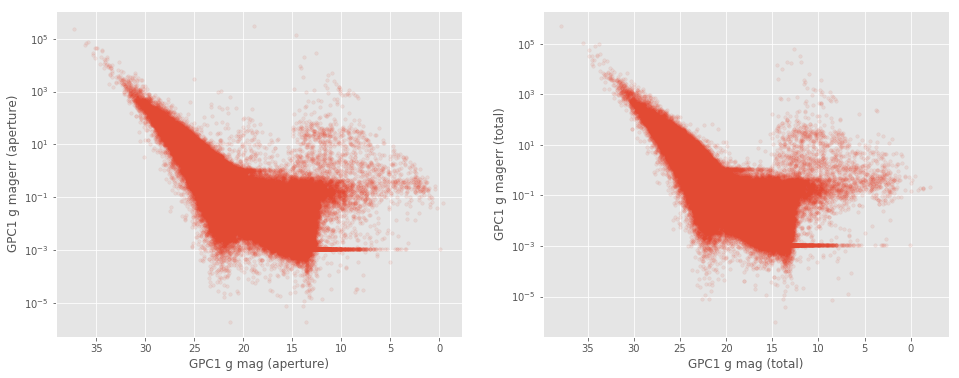

BASS g mag (aperture)
    Error max: 635300
    magerr > 10: Number of objects = 4127, min mag = 27.6
    magerr > 100: Number of objects = 435, min mag = 30.2
    magerr > 1000: Number of objects = 39, min mag = 32.9

BASS g mag (total)
    Error max: 193518
    magerr > 10: Number of objects = 5945, min mag = 15.9
    magerr > 100: Number of objects = 560, min mag = 15.9
    magerr > 1000: Number of objects = 57, min mag = 29.4



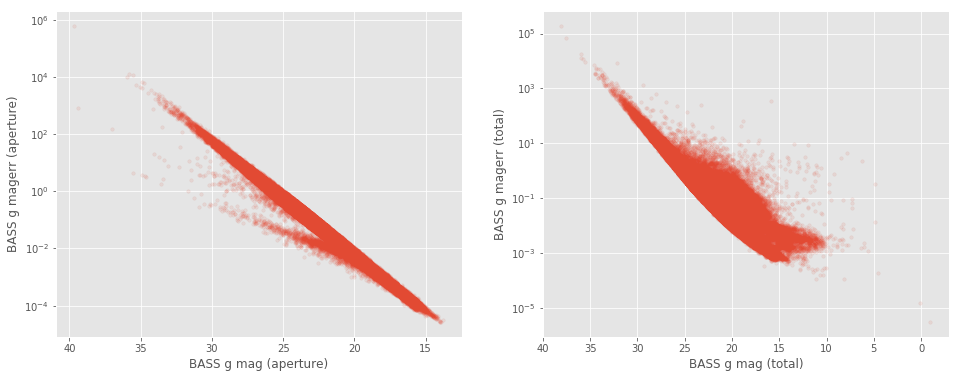

GPC1 r mag (aperture)
    Error max: 49790
    magerr > 10: Number of objects = 5027, min mag = 7.1
    magerr > 100: Number of objects = 473, min mag = 8.2
    magerr > 1000: Number of objects = 45, min mag = 12.8

GPC1 r mag (total)
    Error max: 54399
    magerr > 10: Number of objects = 5058, min mag = 6.0
    magerr > 100: Number of objects = 484, min mag = 6.5
    magerr > 1000: Number of objects = 42, min mag = 13.6



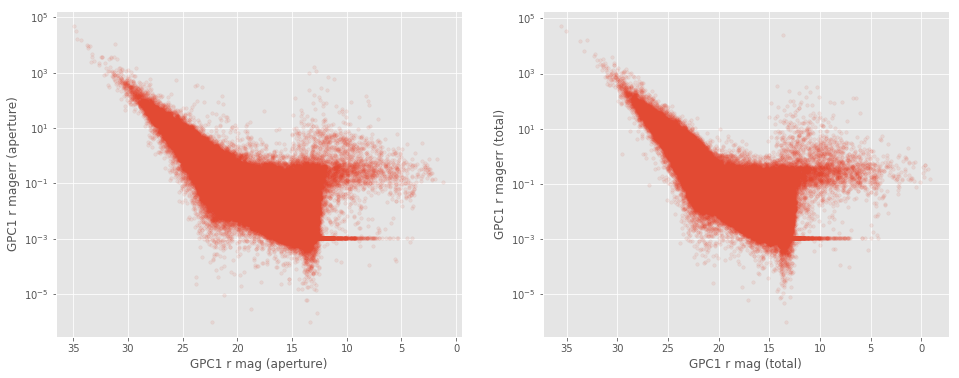

BASS r mag (aperture)
    Error max: 6972
    magerr > 10: Number of objects = 1399, min mag = 27.1
    magerr > 100: Number of objects = 152, min mag = 29.8
    magerr > 1000: Number of objects = 9, min mag = 33.0

BASS r mag (total)
    Error max: 35891
    magerr > 10: Number of objects = 1619, min mag = 18.6
    magerr > 100: Number of objects = 157, min mag = 24.4
    magerr > 1000: Number of objects = 17, min mag = 31.5



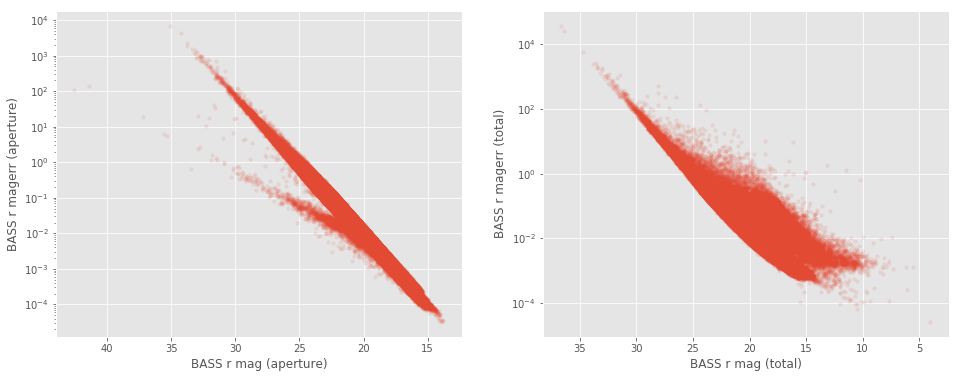

GPC1 i mag (aperture)
    Error max: 13022
    magerr > 10: Number of objects = 1882, min mag = 5.2
    magerr > 100: Number of objects = 171, min mag = 9.1
    magerr > 1000: Number of objects = 16, min mag = 27.8

GPC1 i mag (total)
    Error max: 11312
    magerr > 10: Number of objects = 1980, min mag = 6.1
    magerr > 100: Number of objects = 200, min mag = 6.9
    magerr > 1000: Number of objects = 15, min mag = 13.4



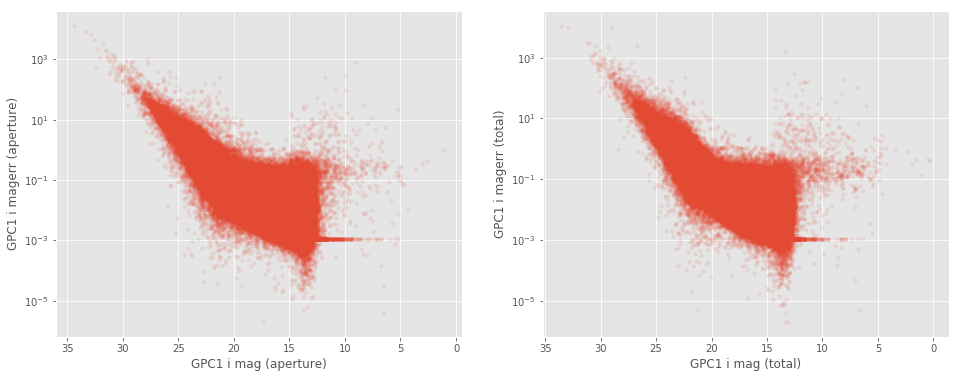

DECam z mag (aperture)
    Error max: 148920
    magerr > 10: Number of objects = 951, min mag = 25.7
    magerr > 100: Number of objects = 92, min mag = 28.3
    magerr > 1000: Number of objects = 8, min mag = 31.8

DECam z mag (total)
    Error max: 10
    magerr > 10: Number of objects = 0, min mag = nan
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan



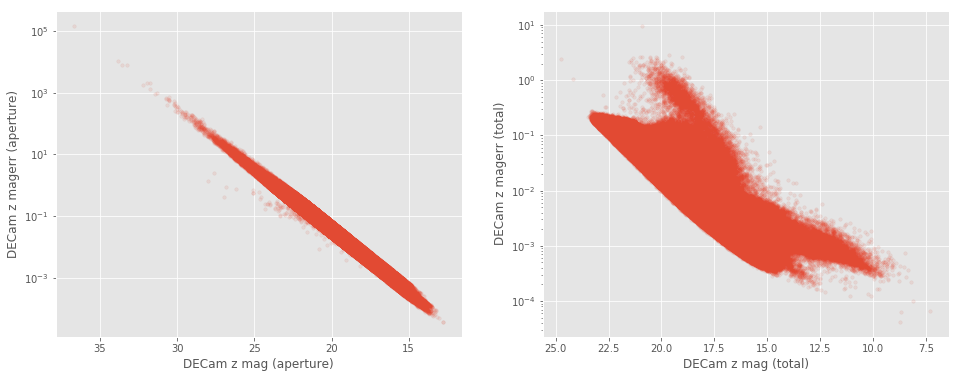

GPC1 z mag (aperture)
    Error max: 40432
    magerr > 10: Number of objects = 2789, min mag = 10.1
    magerr > 100: Number of objects = 272, min mag = 24.6
    magerr > 1000: Number of objects = 34, min mag = 29.4

GPC1 z mag (total)
    Error max: 23925
    magerr > 10: Number of objects = 3236, min mag = 9.8
    magerr > 100: Number of objects = 329, min mag = 24.3
    magerr > 1000: Number of objects = 32, min mag = 27.5



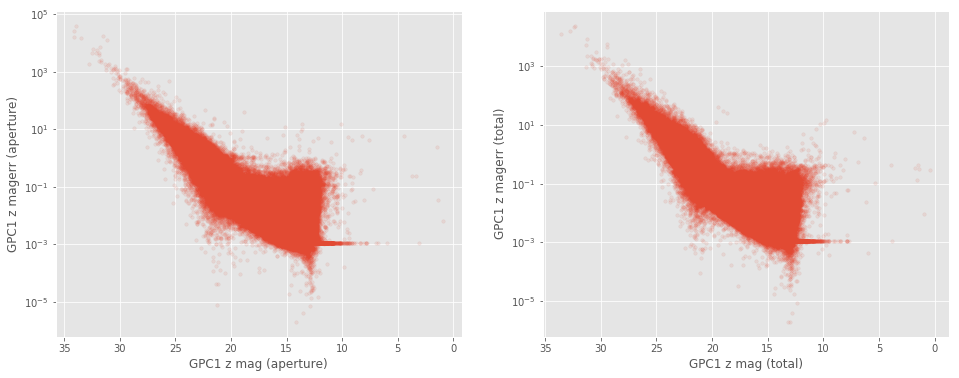

BASS z mag (aperture)
    Error max: 23170
    magerr > 10: Number of objects = 2171, min mag = 25.6
    magerr > 100: Number of objects = 210, min mag = 28.2
    magerr > 1000: Number of objects = 20, min mag = 30.6

BASS z mag (total)
    Error max: 5361
    magerr > 10: Number of objects = 631, min mag = 15.4
    magerr > 100: Number of objects = 70, min mag = 18.8
    magerr > 1000: Number of objects = 4, min mag = 27.4



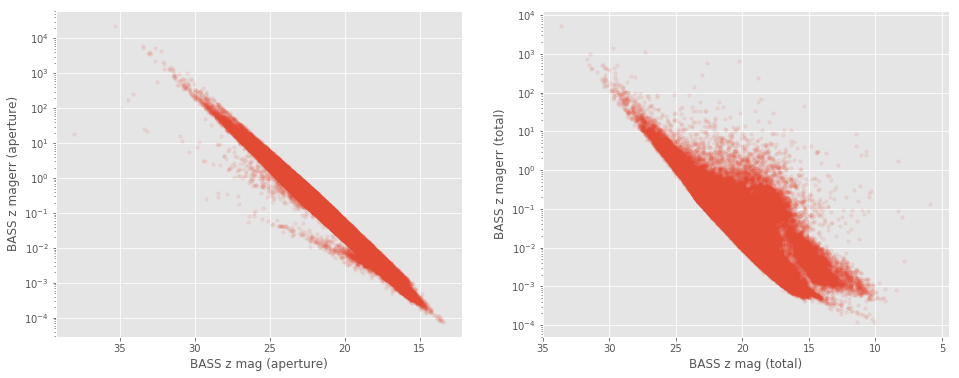

GPC1 y mag (aperture)
    Error max: 47936
    magerr > 10: Number of objects = 9054, min mag = 2.2
    magerr > 100: Number of objects = 877, min mag = 8.6
    magerr > 1000: Number of objects = 88, min mag = 8.6

GPC1 y mag (total)
    Error max: 99935
    magerr > 10: Number of objects = 12093, min mag = 2.4
    magerr > 100: Number of objects = 1169, min mag = 6.1
    magerr > 1000: Number of objects = 123, min mag = 8.8



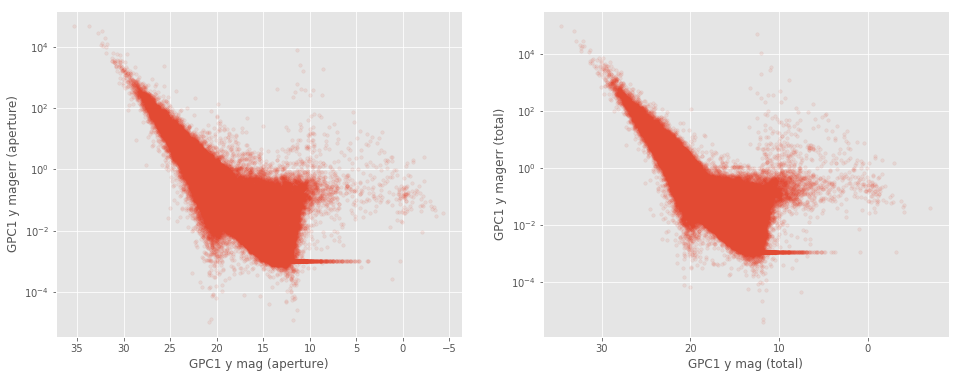

UKIDSS Y mag (aperture)
    Error max: 60
    magerr > 10: Number of objects = 22, min mag = 22.8
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

UKIDSS Y mag (total)
    Error max: 7294
    magerr > 10: Number of objects = 467, min mag = 22.6
    magerr > 100: Number of objects = 47, min mag = 25.7
    magerr > 1000: Number of objects = 4, min mag = 29.7



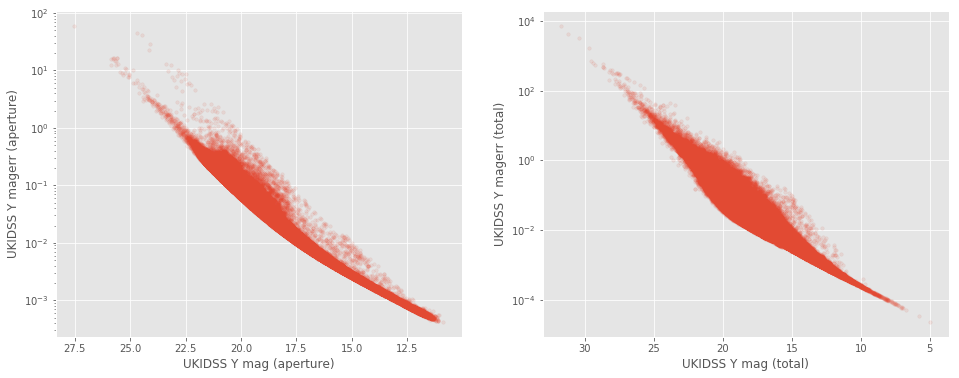

UKIDSS J mag (aperture)
    Error max: 860
    magerr > 10: Number of objects = 35, min mag = 24.1
    magerr > 100: Number of objects = 4, min mag = 27.8
    magerr > 1000: Number of objects = 0, min mag = nan

UKIDSS J mag (total)
    Error max: 7703
    magerr > 10: Number of objects = 124, min mag = 21.9
    magerr > 100: Number of objects = 36, min mag = 25.9
    magerr > 1000: Number of objects = 12, min mag = 28.0



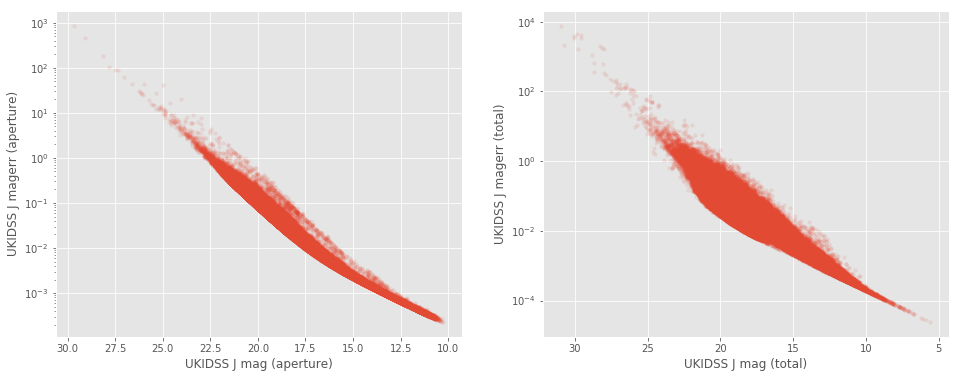

UKIDSS H mag (aperture)
    Error max: 1652
    magerr > 10: Number of objects = 3, min mag = 24.7
    magerr > 100: Number of objects = 1, min mag = 29.3
    magerr > 1000: Number of objects = 1, min mag = 29.3

UKIDSS H mag (total)
    Error max: 7779
    magerr > 10: Number of objects = 320, min mag = 22.0
    magerr > 100: Number of objects = 39, min mag = 23.9
    magerr > 1000: Number of objects = 6, min mag = 28.5



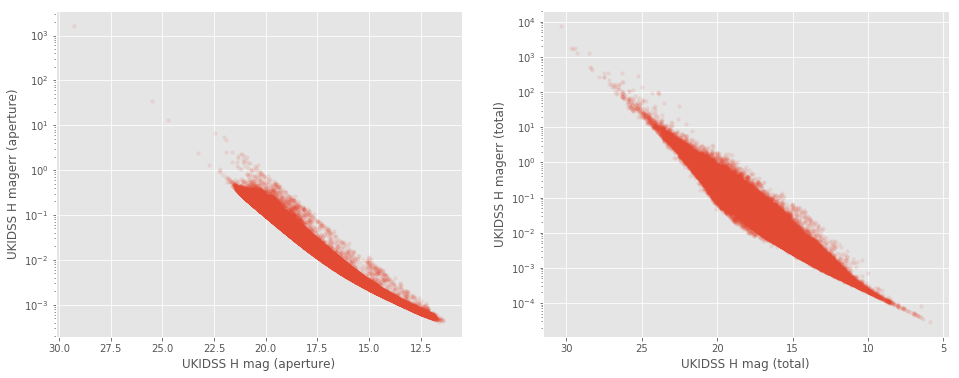

UKIDSS K mag (aperture)
    Error max: 5
    magerr > 10: Number of objects = 0, min mag = nan
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

UKIDSS K mag (total)
    Error max: 128116
    magerr > 10: Number of objects = 309, min mag = 22.2
    magerr > 100: Number of objects = 28, min mag = 26.1
    magerr > 1000: Number of objects = 3, min mag = 28.3



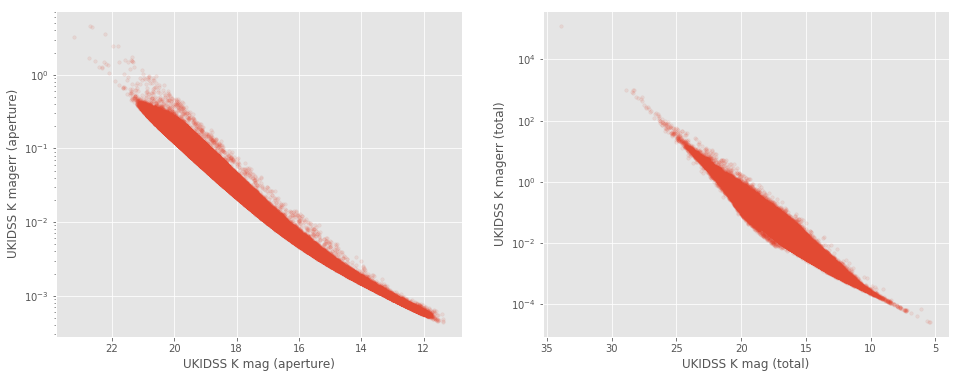

In [11]:
for mag in all_mags:

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
        
    basecol = mag.replace(" ", "_").lower()
    
    #if basecol == "omegacam_u":
    if basecol == "bass_g":
        savefig = True
    else:
        savefig=False
        
    col, ecol = "m_ap_{}".format(basecol), "merr_ap_{}".format(basecol)
    mag_vs_err(master_catalogue[col], master_catalogue[ecol], fig, ax1,
               labels=("{} mag (aperture)".format(mag), "{} magerr (aperture)".format(mag)), savefig=False)

    
    col, ecol = "m_{}".format(basecol), "merr_{}".format(basecol)
    mag_vs_err(master_catalogue[col], master_catalogue[ecol], fig, ax2,
               labels=("{} mag (total)".format(mag), "{} magerr (total)".format(mag)), savefig=savefig)
    
    display(fig)
    plt.close()


## 2. Magnitude and error issues

In [9]:
def flag_mag(mask, x1, y1, x2, y2, mask2=None, x3=None, y3=None, mask3=None,
             labels1=("x", "y"), labels2=("x", "y"), labels3=("x", "y"), nb=2,
             irac=False, savefig=False):

    if nb == 1 and not irac:
        fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 6))
    elif nb == 2 or (nb == 1 and irac and x3 is None):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    elif nb > 2 or (nb == 1 and x3 is not None):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
    
    # mag vs magerr
    ax1.set_yscale('log')    # to place before scatter to avoid issues
    ax1.scatter(x1, y1, marker='.', alpha=0.1, s=50)
    ax1.plot(x1[mask], y1[mask], 'b.')
    if mask2 is not None and nb >= 2:
        ax1.plot(x1[mask2], y1[mask2], 'g.')
    ax1.invert_xaxis()
    ax1.set_xlabel(labels1[0])
    ax1.set_ylabel(labels1[1])
    
    if nb == 1 and irac:
        # IRAC mag
        ax2.set_yscale('log')    # to place before scatter to avoid issues
        ax2.scatter(x2, y2, marker='.', alpha=0.1, s=50)
        ax2.plot(x2[mask2], y2[mask2], 'b.')
        ax2.invert_xaxis()
        ax2.set_xlabel(labels2[0])
        ax2.set_ylabel(labels2[1])
        
    if nb == 1 and x3 is not None:
        # IRAC mag with i3
        ax3.set_yscale('log')    # to place before scatter to avoid issues
        ax3.scatter(x3, y3, marker='.', alpha=0.1, s=50)
        ax3.plot(x3[mask3], y3[mask3], 'b.')
        ax3.invert_xaxis()
        ax3.set_xlabel(labels3[0])
        ax3.set_ylabel(labels3[1])
    
    # Comparing magnitudes
    if nb >= 2:
        ax2.scatter(x2, y2, marker='.', alpha=0.1, s=50)
        ax2.plot(x2[mask], y2[mask], 'b.')
        if mask2 is not None:
            ax2.plot(x2[mask2], y2[mask2], 'g.')
        ax2.invert_xaxis()
        ax2.invert_yaxis()
        ax2.set_xlabel(labels2[0])
        ax2.set_ylabel(labels2[1])
    
    if nb >= 3:
        ax3.scatter(x3, y3, marker='.', alpha=0.1, s=50)
        ax3.plot(x3[mask], y3[mask], 'b.')
        if mask2 is not None:
            ax3.plot(x3[mask2], y3[mask2], 'g.')
        ax3.invert_xaxis()
        ax3.invert_yaxis()
        ax3.set_xlabel(labels3[0])
        ax3.set_ylabel(labels3[1])
    
    # Save ex. fig
    if savefig:
        survey_label = ((labels1[0].replace(" ", "_")).replace("(", "")).replace(")", "")
        if "GPC1 " in labels1[0]:
            figname = field + "_gpc1Issues_" + survey_label + ".png"
        elif "DECam" in labels1[0]:
            figname = field + "_decamIssues_" + survey_label + ".png"
        elif "IRAC" in labels1[0]:
            figname = field + "_iracIssues_i1_i2.png"
        elif "WIRCS" in labels1[0]:
            figname = field + "_wircsIssues.png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')
        
    display(fig)
    plt.close()

### 2.a Pan-STARRS Aperture and Total magnitudes

GPC1 g
   Number of flagged objects: 1408


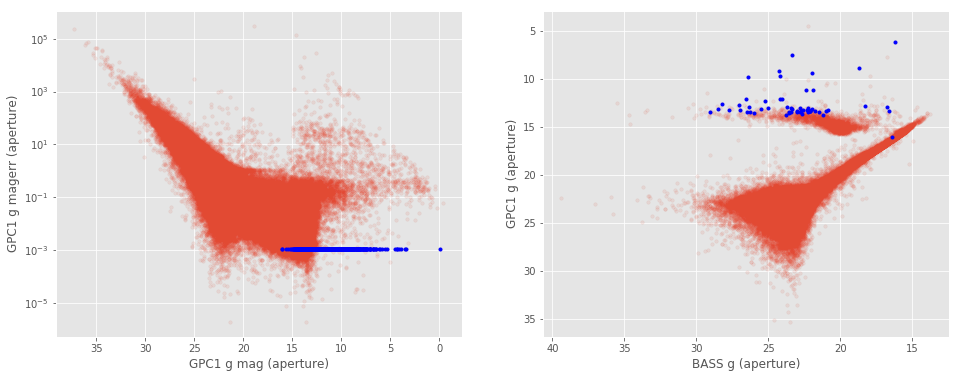

GPC1 r
   Number of flagged objects: 2057


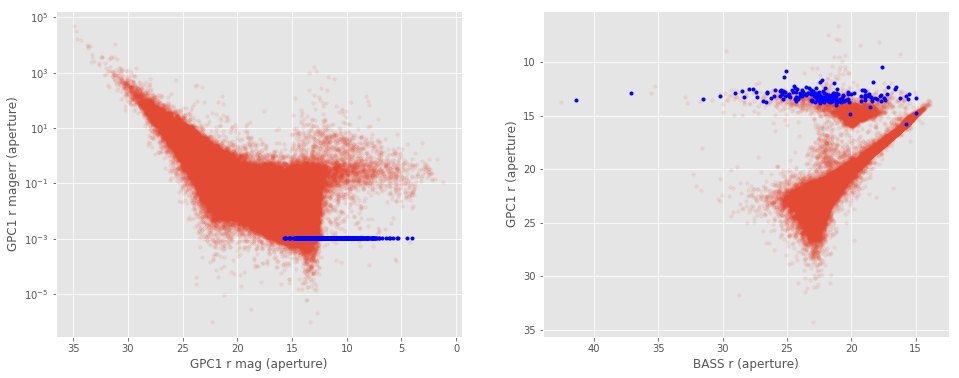

GPC1 i
   Number of flagged objects: 2167


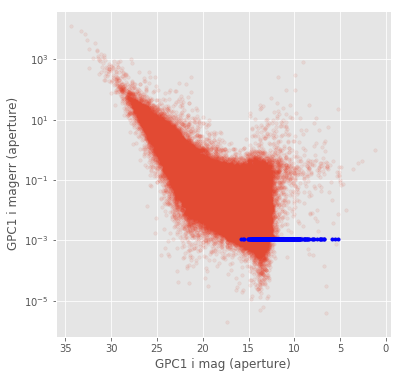

GPC1 z
   Number of flagged objects: 1556


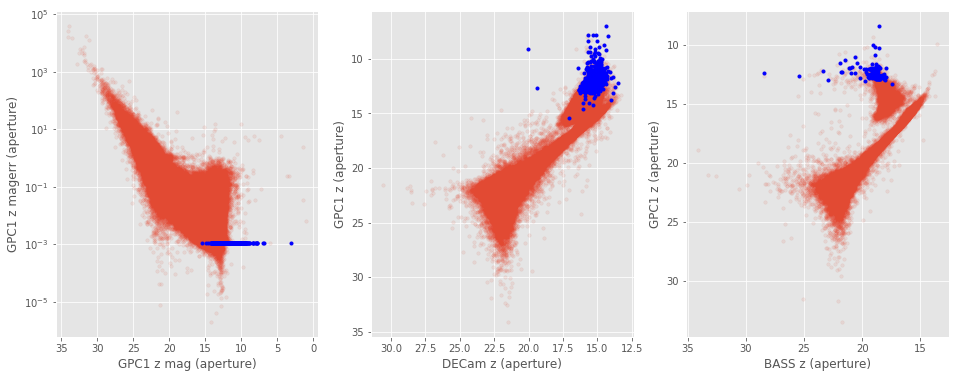

GPC1 y
   Number of flagged objects: 641


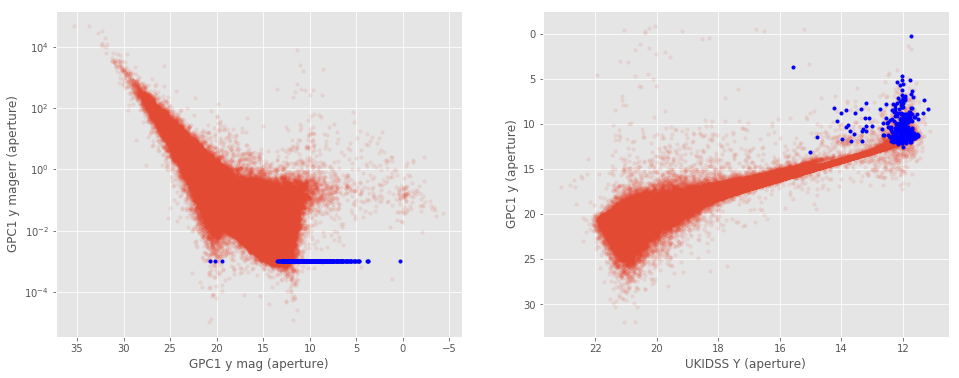

In [10]:
# PanSTARRS forced photometry catalogue
ps1_err = 0.0010860000038519502

bands = ['g', 'r', 'i', 'z', 'y']

for i, surveys in enumerate([g_bands, r_bands, i_bands, z_bands, y_bands]):
    surveys.insert(0, surveys.pop(surveys.index('GPC1 '+ bands[i])))
    print(surveys[0])
    
    if len(surveys) == 1:
        basecol1 = surveys[0].replace(" ", "_").lower()
        col1 = "m_ap_{}".format(basecol1)
        x2, labels2 = None, None
    else:
        basecol1, basecol2 = surveys[0].replace(" ", "_").lower(), surveys[1].replace(" ", "_").lower()
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        x2 = master_catalogue[col2]
        labels2 = ("{} (aperture)".format(surveys[1]), "{} (aperture)".format(surveys[0]))
    ecol1 = "merr_ap_{}".format(basecol1)
    
    if len(surveys) >= 3:
        basecol3 = surveys[2].replace(" ", "_").lower()
        col3 = "m_ap_{}".format(basecol3)
        x3, y3 = master_catalogue[col3], master_catalogue[col1]
        labels3 = ("{} (aperture)".format(surveys[2]), "{} (aperture)".format(surveys[0]))
    else:
        x3, y3, labels3 = None, None, None
        
    if basecol1 == 'gpc1_g':
        savefig = True
    else:
        savefig = False

        
    mask = np.where(master_catalogue[ecol1] == ps1_err)    
    print ('   Number of flagged objects:', len(master_catalogue[ecol1][mask]))

    flag_mag(mask, master_catalogue[col1], master_catalogue[ecol1],
                    x2, master_catalogue[col1], 
                    x3=x3, y3=y3,
                    labels1=("{} mag (aperture)".format(surveys[0]), "{} magerr (aperture)".format(surveys[0])),
                    labels2=labels2,
                    labels3=labels3, nb=len(surveys), savefig=savefig)

### 2.b. DECaLS total magnitudes

DECam z
   Number of flagged objects (m=14.999935): 1
   Number of flagged objects (m < 7 (and m=0)): 0 (0)


/data/vault/epons/conda_envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


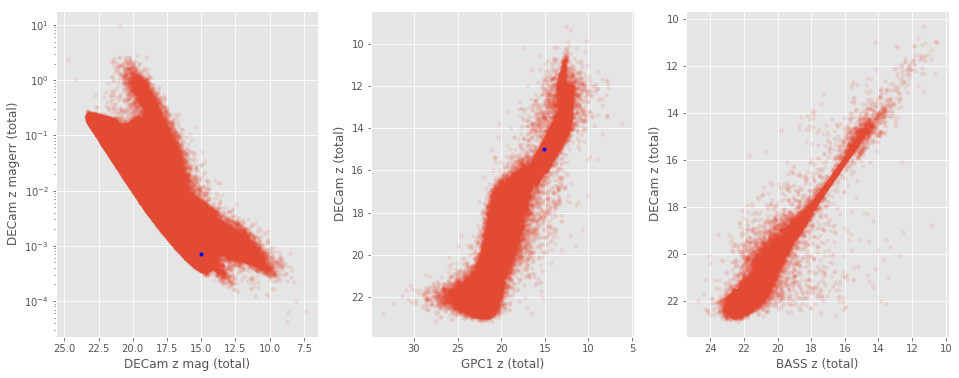

In [12]:
#bands = ['g', 'r', 'z']
bands = ['z']

#for i, surveys in enumerate([g_bands, r_bands, z_bands]):
for i, surveys in enumerate([z_bands]):
    surveys.insert(0, surveys.pop(surveys.index('DECam '+ bands[i])))
    print(surveys[0])
    
    basecol1, basecol2 = surveys[0].replace(" ", "_").lower(), surveys[1].replace(" ", "_").lower()
    col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
    ecol1 = "merr_{}".format(basecol1)
    
    if len(surveys) >= 3:
        basecol3 = surveys[2].replace(" ", "_").lower()
        col3 = "m_{}".format(basecol3)
        x3, y3 = master_catalogue[col3], master_catalogue[col1]
        labels3 = ("{} (total)".format(surveys[2]), "{} (total)".format(surveys[0]))
    else:
        x3, y3, labels3 = None, None, None
        
    if basecol1 == 'decam_z':
        savefig = True
    else:
        savefig = False

    def cstr(s, color=34):
        # ANSI color: red: color=31, blue: color=34, green:color=32
        return "\x1b[{}m{}\x1b[0m".format(color, s)


    mask = (master_catalogue[col1] == 14.999935)
    print ('   Number of flagged objects ({}): {}'.format(cstr('m=14.999935'), len(master_catalogue[ecol1][mask])))
    mask2 = (master_catalogue[col1] < 7)
    mag0 = (master_catalogue[col1] < 0)
    print('   Number of flagged objects ({}): {} ({})'.format(cstr('m < 7 (and m=0)', color=32),\
                                                                           len(master_catalogue[ecol1][mask2]),\
                                                                           len(master_catalogue[ecol1][mag0])))

    flag_mag(mask, master_catalogue[col1], master_catalogue[ecol1],
                   master_catalogue[col2], master_catalogue[col1], 
                   x3=x3, y3=y3, mask2=mask2, 
                   labels1=("{} mag (total)".format(surveys[0]), "{} magerr (total)".format(surveys[0])),
                   labels2=("{} (total)".format(surveys[1]), "{} (total)".format(surveys[0])),
                   labels3=labels3, nb=len(surveys), savefig=savefig)

## 3/ Outliers

$$chi^2 = \frac{(mag_{1}-mag_{2})^2}{magerr_{1}^2 + magerr_{2}^2}$$ 
<br>
__Interquartile range (IQR) and outliers:__<br>
We consider as outliers objects which have a high $chi^2$, about $5\sigma$ away from the mean.<br>
$25th, 75th \;percentile = 0.6745\sigma$<br>
$IQR = (75th \;percentile - 25th \;percentile) = 0.6745\sigma * 2 = 1.349\sigma$<br>
$75th \;percentile + 3.2\times IQR = 0.6745\sigma + 3.2\times1.349\sigma = 4.7\sigma$
<br><br>
$$outliers == [chi^2 >  (75th \;percentile + 3.2\times (75th \;percentile - 25th \;percentile))]$$
<br><br>
__NB:__<br>
Bright sources tend to have their errors underestimated with values as low as $10^{-6}$, which is unrealistic. So to avoid high $chi^2$ due to unrealistic small errors, we clip the error to get a minimum value of 0.1% (i.e. all errors smaller then $10^{-3}$ are set to $10^{-3}$).

In [13]:
def outliers(x, y, xerr, yerr, labels=["x", "y"], savefig=False):
    
    import matplotlib
    import matplotlib.gridspec as gridspec
    from astropy import visualization as vz
    
    fig = plt.figure(figsize=(13, 6))

    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(left=0.05, right=0.4, wspace=0.05)
    ax1 = plt.subplot(gs1[:, :-1])

    gs2 = gridspec.GridSpec(1, 3)
    gs2.update(left=0.47, right=0.98, hspace=0.05, wspace=0.05)
    ax2 = plt.subplot(gs2[:, :-1])
    ax3 = plt.subplot(gs2[:, -1], sharey=ax2)

    
    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(xerr) & np.isfinite(yerr)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
    xerr = np.copy(xerr[mask])
    yerr = np.copy(yerr[mask])
    
    # mag1 - mag2
    diff = y - x

    x_label, y_label = labels
    
    # If the difference is all NaN there is nothing to compare.
    if np.isnan(diff).all():
        print("No sources have both {} and {} values.".format(
            x_label, y_label))
        print("")
        return
    
    # Set the minimum error to 10^-3
    np.clip(xerr, 1e-3, np.max(xerr), out=xerr)
    np.clip(yerr, 1e-3, np.max(yerr), out=yerr)

    # Median, Median absolute deviation and 1% and 99% percentiles
    diff_median = np.median(diff)
    diff_mad = np.median(np.abs(diff - diff_median))
    diff_1p, diff_99p = np.percentile(diff, [1., 99.])
    diff_25p, diff_75p = np.percentile(diff, [25., 75.])
    
    
    diff_label = "{} - {}".format(y_label, x_label)

    print("{} ({} sources):".format(diff_label, len(x)))
    print("- Median: {:.2f}".format(diff_median))
    print("- Median Absolute Deviation: {:.2f}".format(diff_mad))
    print("- 1% percentile: {}".format(diff_1p))
    print("- 99% percentile: {}".format(diff_99p))

    
    # Chi2 (Normalized difference)   
    ichi2 = np.power(diff, 2) / (np.power(xerr, 2) + np.power(yerr, 2))
    
    # Use only non-null values of ichi2
    mask2 = ichi2 != 0.0
    diff, ichi2 = np.copy(diff[mask2]), np.copy(ichi2[mask2])
    x, y, xerr, yerr = np.copy(x[mask2]), np.copy(y[mask2]), np.copy(xerr[mask2]), np.copy(yerr[mask2])

    # Outliers (5sigma)
    log_ichi2_25p, log_ichi2_75p = np.percentile(np.log10(ichi2), [25., 75.])
    out_lim = log_ichi2_75p + 3.2*abs(log_ichi2_25p-log_ichi2_75p)
    
    outliers = np.log10(ichi2) > out_lim 
    nb_outliers = len(x[outliers])
    
    print("Outliers separation: log(chi2) = {:.2f}".format(out_lim))
    print("Number of outliers: {}".format(nb_outliers))

    print("")

    # Comparing mag
    ax1.scatter(x, y, marker='.', alpha=0.1, s=50)
    ax1.scatter(x[outliers], y[outliers], marker='.', c='b', alpha=0.3, s=50, label='Outliers ({})'.format(nb_outliers))
    min_val = np.min(np.r_[x, y])
    max_val = np.max(np.r_[x, y])
    ax1.autoscale(False)
    ax1.plot([min_val, max_val], [min_val, max_val], "k:")
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.legend(loc='lower right', numpoints=1)
    

    # Chi2 vs Diff
    #ax1.set_yscale('log')    # to place before scatter to avoid issues
    ax2.scatter(diff, np.log10(ichi2), marker='.', alpha=0.1, s=50)
    if nb_outliers != 0:
        ax2.scatter(diff[outliers], np.log10(ichi2[outliers]), marker='.', alpha=0.3, s=50, color='b',\
                    label='Outliers ({})'.format(nb_outliers))
    ax2.axhline(out_lim, color='grey', linestyle=':')
    ax2.set_xlabel(diff_label)
    ax2.set_ylabel('log(chi2)')
    ax2.legend(loc='lower right', numpoints=1)
    
    # Hist
    n, bins, patches = vz.hist(np.log10(ichi2), ax=ax3, bins='knuth', facecolor='red', lw = 2, alpha=0.5,\
                                   orientation="horizontal")
    if nb_outliers > 3:
        n, bins, patches = vz.hist(np.log10(ichi2[outliers]), ax=ax3, bins='knuth', facecolor='b', lw = 2, alpha=0.7,\
                                   orientation="horizontal")
    ax3.axhline(out_lim, color='grey', linestyle=':')
    ax3.yaxis.set_tick_params(labelleft=False)
    
    # Save ex. fig
    if savefig:
        survey_label = ((diff_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_outliers_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')


    display(fig)
    plt.close()

BASS g (aperture) - GPC1 g (aperture) (434368 sources):
- Median: 0.16
- Median Absolute Deviation: 0.25
- 1% percentile: -1.8993983268737793
- 99% percentile: 3.54915212631226
Outliers separation: log(chi2) = 5.36
Number of outliers: 1969



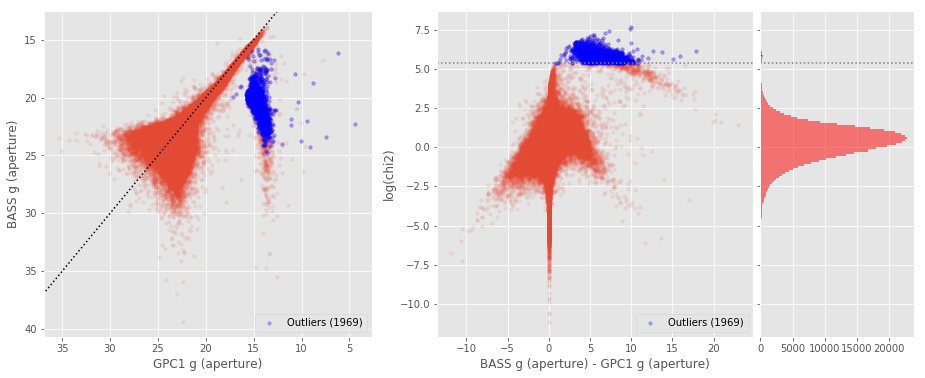

BASS g (total) - GPC1 g (total) (437296 sources):
- Median: -0.00
- Median Absolute Deviation: 0.23
- 1% percentile: -1.5988301277160644
- 99% percentile: 2.9839715003967267
Outliers separation: log(chi2) = 4.71
Number of outliers: 406



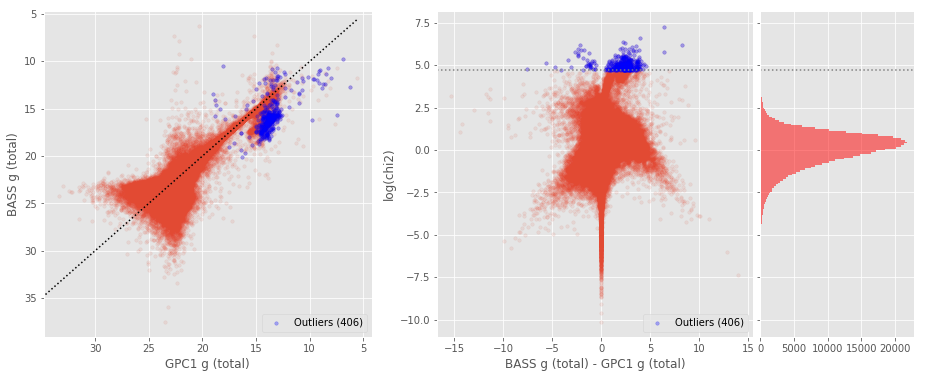

BASS r (aperture) - GPC1 r (aperture) (545419 sources):
- Median: -0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3436206436157225
- 99% percentile: 2.164133319854683
Outliers separation: log(chi2) = 4.82
Number of outliers: 3945



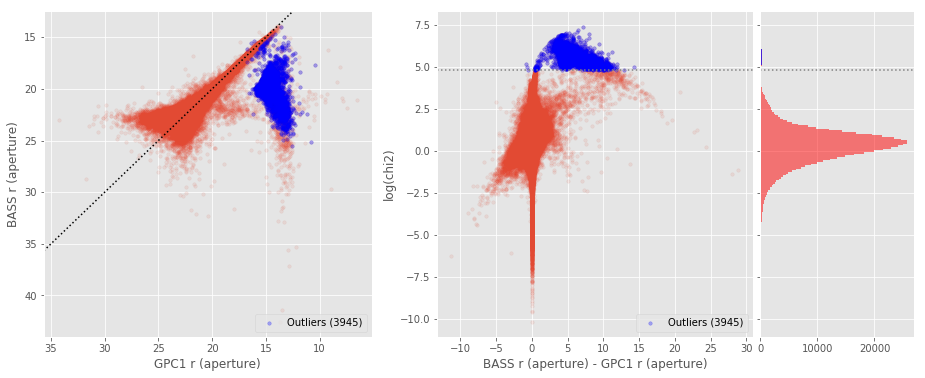

BASS r (total) - GPC1 r (total) (546030 sources):
- Median: -0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -1.291554069519043
- 99% percentile: 1.325196399688716
Outliers separation: log(chi2) = 5.46
Number of outliers: 73



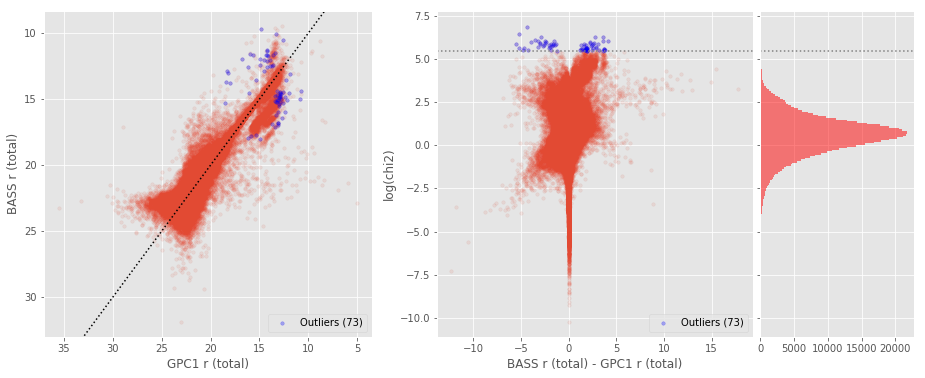

GPC1 z (aperture) - DECam z (aperture) (2612628 sources):
- Median: 0.15
- Median Absolute Deviation: 0.12
- 1% percentile: -1.3645053482055665
- 99% percentile: 1.171778297424316
Outliers separation: log(chi2) = 5.03
Number of outliers: 23652



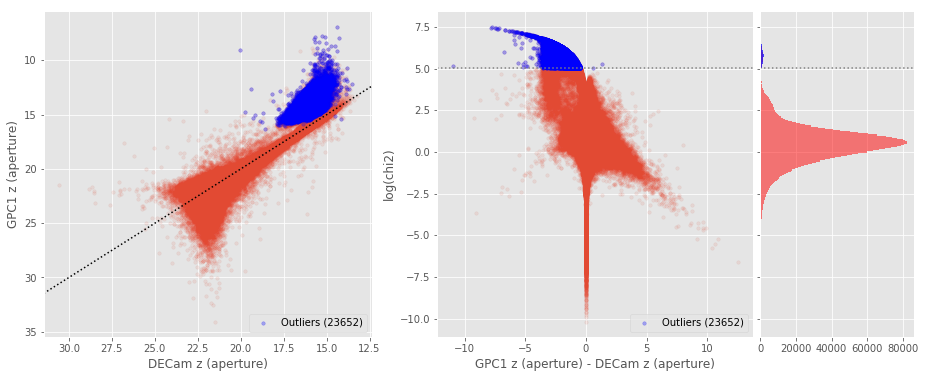

GPC1 z (total) - DECam z (total) (2613218 sources):
- Median: 0.26
- Median Absolute Deviation: 0.14
- 1% percentile: -0.7166573143005371
- 99% percentile: 1.356721229553223
Outliers separation: log(chi2) = 5.75
Number of outliers: 320



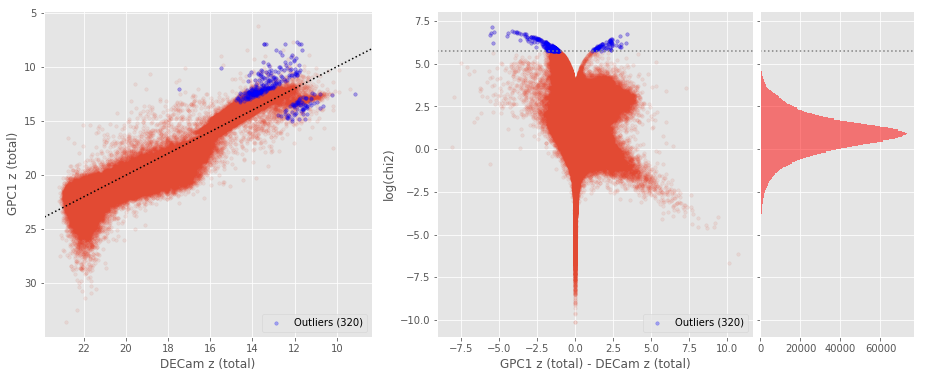

BASS z (aperture) - DECam z (aperture) (92266 sources):
- Median: 0.01
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8405391693115234
- 99% percentile: 2.199215316772468
Outliers separation: log(chi2) = 4.08
Number of outliers: 1404



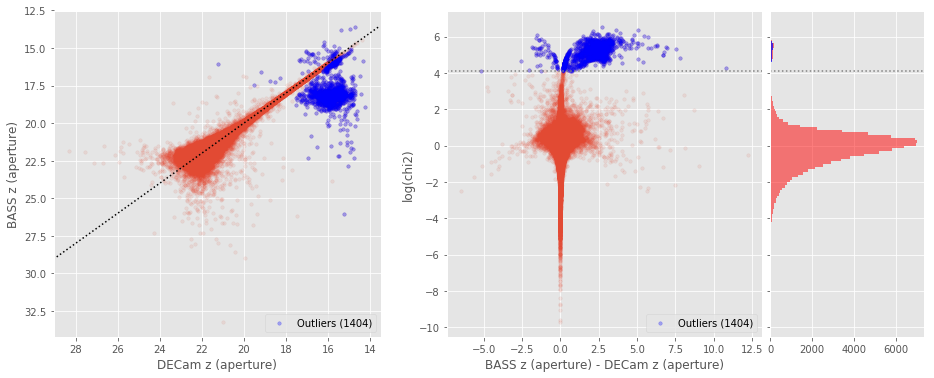

BASS z (total) - DECam z (total) (92547 sources):
- Median: -0.01
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8669711303710937
- 99% percentile: 1.0804067993164062
Outliers separation: log(chi2) = 5.01
Number of outliers: 60



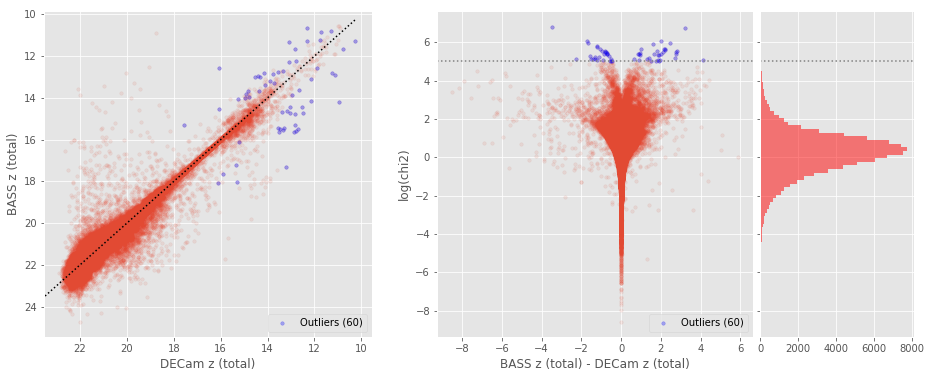

BASS z (aperture) - GPC1 z (aperture) (336076 sources):
- Median: -0.11
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1134843826293945
- 99% percentile: 2.9018537998199463
Outliers separation: log(chi2) = 4.97
Number of outliers: 4331



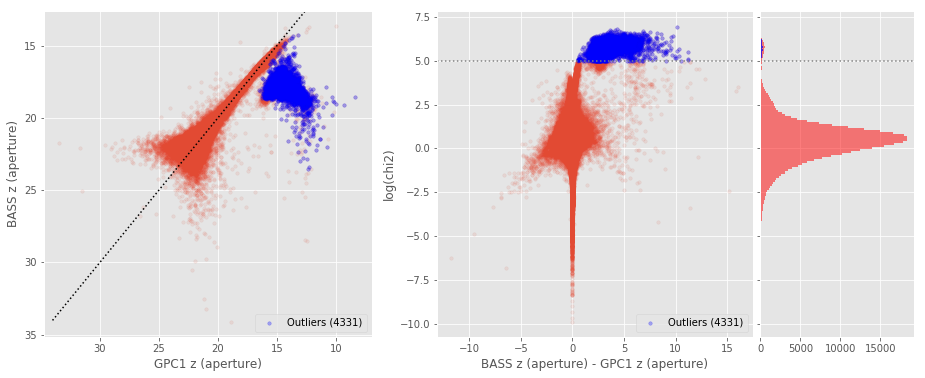

BASS z (total) - GPC1 z (total) (336473 sources):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2559052276611329
- 99% percentile: 0.8657968139648397
Outliers separation: log(chi2) = 5.70
Number of outliers: 31



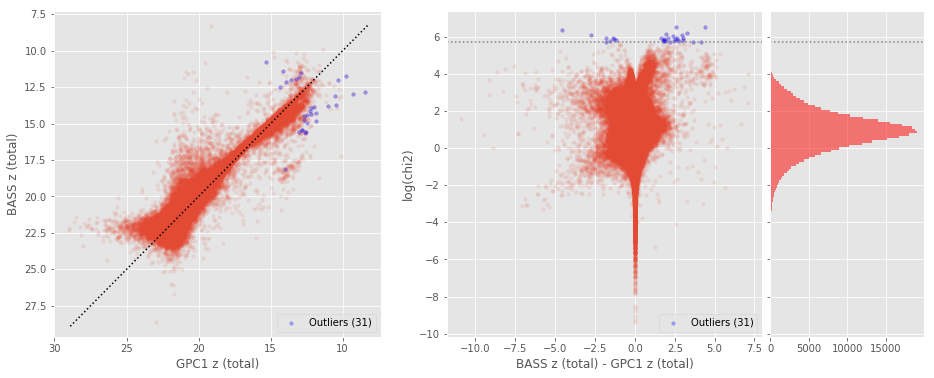

UKIDSS Y (aperture) - GPC1 y (aperture) (1429699 sources):
- Median: 0.21
- Median Absolute Deviation: 0.25
- 1% percentile: -1.1312182235717774
- 99% percentile: 1.268341445922852
Outliers separation: log(chi2) = 5.32
Number of outliers: 345



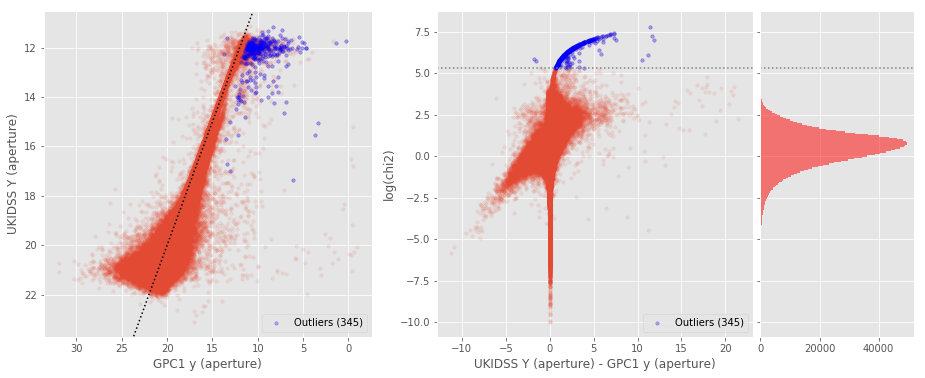

UKIDSS Y (total) - GPC1 y (total) (1428624 sources):
- Median: -0.06
- Median Absolute Deviation: 0.17
- 1% percentile: -1.0493117332458497
- 99% percentile: 1.5016025352478044
Outliers separation: log(chi2) = 4.53
Number of outliers: 576



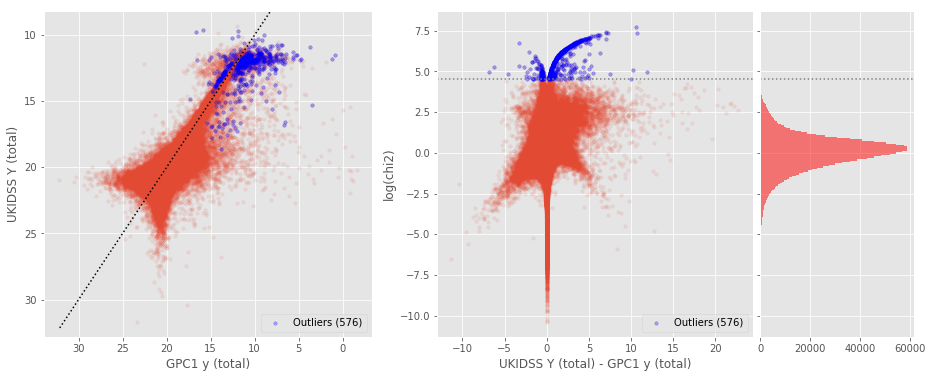

In [15]:
for band_of_a_kind in all_bands:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):

        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        if basecol1 == "gpc1_g" and basecol2 == "bass_g":
            savefig = True
        else:
            savefig = False
        
        # Aperture mag
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        ecol1, ecol2 = "merr_ap_{}".format(basecol1), "merr_ap_{}".format(basecol2)
        outliers(master_catalogue[col1], master_catalogue[col2],
                 master_catalogue[ecol1], master_catalogue[ecol2],
                 labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)), savefig=savefig)
        
        # Tot mag
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        ecol1, ecol2 = "merr_{}".format(basecol1), "merr_{}".format(basecol2)
        outliers(master_catalogue[col1], master_catalogue[col2], 
                 master_catalogue[ecol1], master_catalogue[ecol2],
                 labels=("{} (total)".format(band1), "{} (total)".format(band2)))
        
for j in range(40):
    plt.close() 

## 4/ Aperture correction issues

In [16]:
def apcor_check(x, y, stellarity, labels=["x", "y"], savefig=False):
    import matplotlib.gridspec as gridspec
    from astropy import visualization as vz
    
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))   # 
    fig = plt.figure(figsize=(13, 6))

    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(left=0.05, right=0.4, wspace=0.05)
    ax1 = plt.subplot(gs1[:, :-1])

    gs2 = gridspec.GridSpec(1, 3)
    gs2.update(left=0.47, right=0.98, hspace=0.05, wspace=0.05)
    ax2 = plt.subplot(gs2[:, :-1])
    ax3 = plt.subplot(gs2[:, -1], sharey=ax2)

    
    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(stellarity)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
    stellarity = np.copy(stellarity[mask])


    diff = y - x

    x_label, y_label = labels
    
    # If the difference is all NaN there is nothing to compare.
    if np.isnan(diff).all():
        print("No sources have both {} and {} values.".format(
            x_label, y_label))
        print("")
        return
    
    
    diff_label = "{} - {}".format(y_label, x_label)
    print("{}:".format(diff_label))
    
    # Subsample
    zoom = (x > 16) & (x < 20)


    # Comparing mag
    ax1.scatter(x, diff, marker='.', alpha=0.1, s=50)
    ax1.invert_xaxis()
    ax1.set_ylabel(diff_label)
    ax1.set_xlabel(x_label)
    

    # Zoom Plot
    y_min, y_max = np.percentile(diff[zoom], [1., 99.])
    y_delta = .1 * (y_max - y_min)
    y_min -= y_delta
    y_max += y_delta

    if len(x[zoom]) < 1000:
        alpha = 0.4
    else:
        alpha = 0.1
    pl = ax2.scatter(x[zoom], diff[zoom], marker='.', alpha=alpha, s=50, c=stellarity[zoom], cmap="jet")
    ax2.invert_xaxis()
    ax2.set_ylabel(diff_label)
    ax2.set_xlabel(x_label)
    ax2.set_ylim([y_min, y_max])
    fig.colorbar(pl, label="stellarity (1=star)")
    
    #ax2.legend(loc='lower right', numpoints=1)
    
    # Hist
    n, bins, patches = vz.hist(diff[zoom], ax=ax3, bins='knuth', facecolor='black', lw = 2, alpha=0.5,\
                                   orientation="horizontal")
    ax3.yaxis.set_tick_params(labelleft=False)
    
    # Save ex. fig
    if savefig:
        survey_label = ((diff_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_apcorrIssues_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')


    display(fig)
    plt.close()

BASS g (aperture) - GPC1 g (aperture):


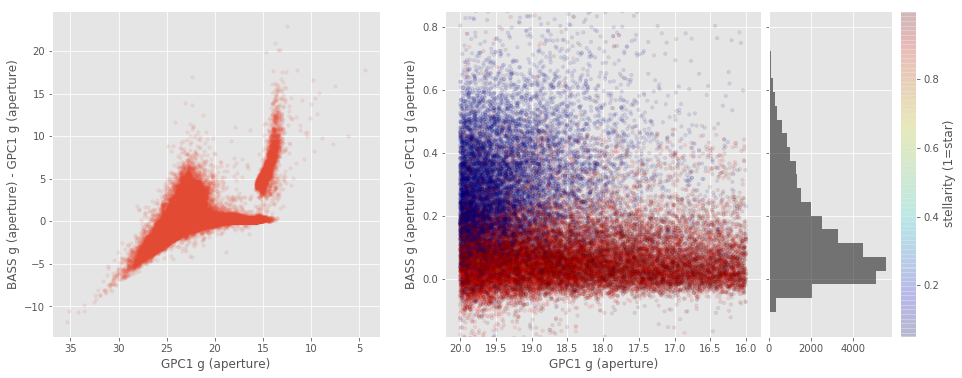

BASS r (aperture) - GPC1 r (aperture):


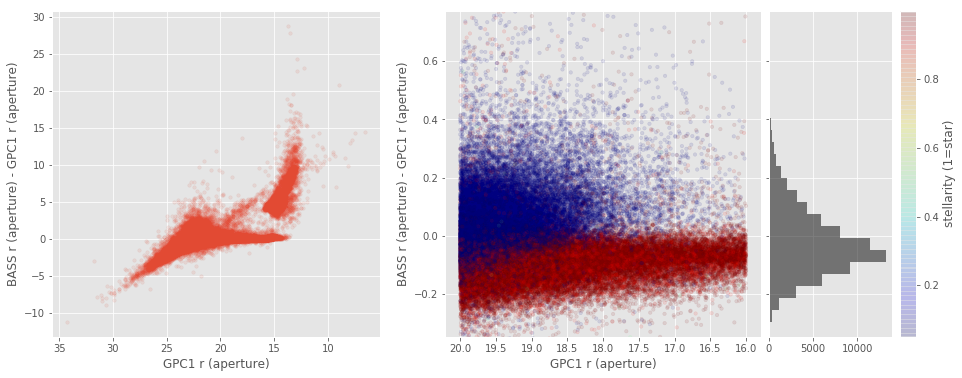

GPC1 z (aperture) - DECam z (aperture):


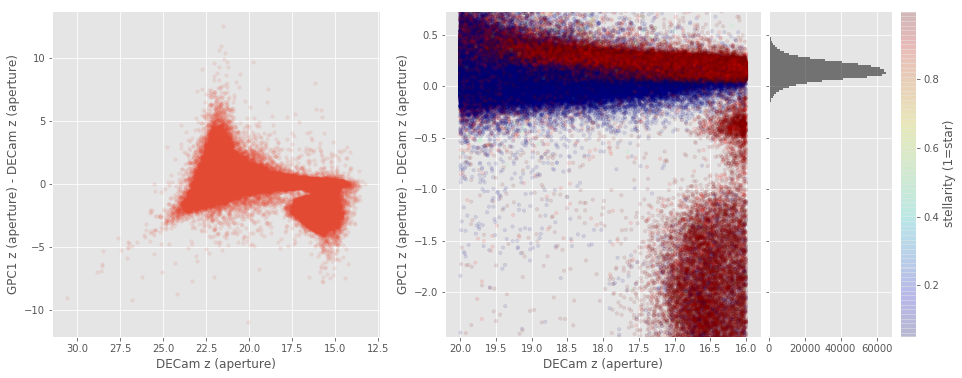

BASS z (aperture) - DECam z (aperture):


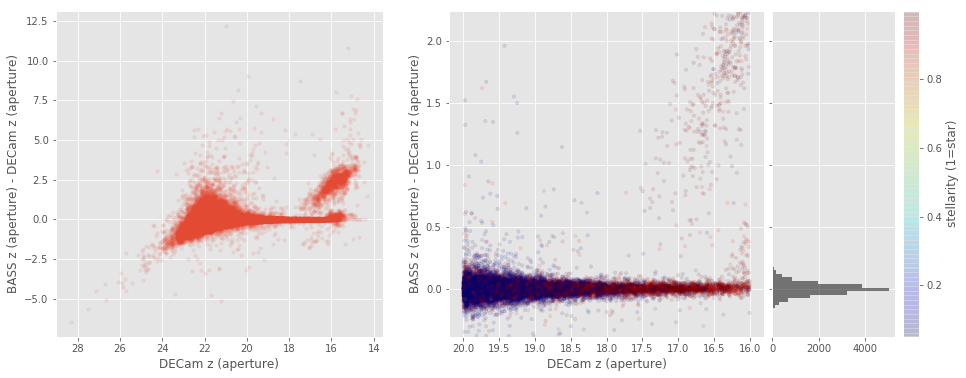

BASS z (aperture) - GPC1 z (aperture):


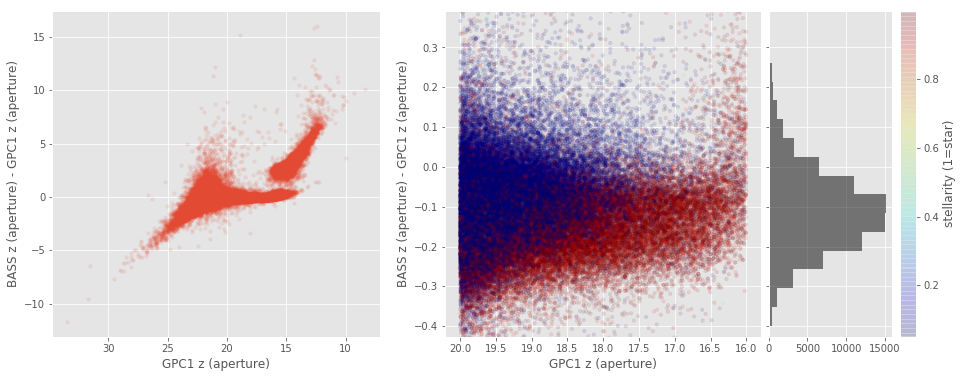

UKIDSS Y (aperture) - GPC1 y (aperture):


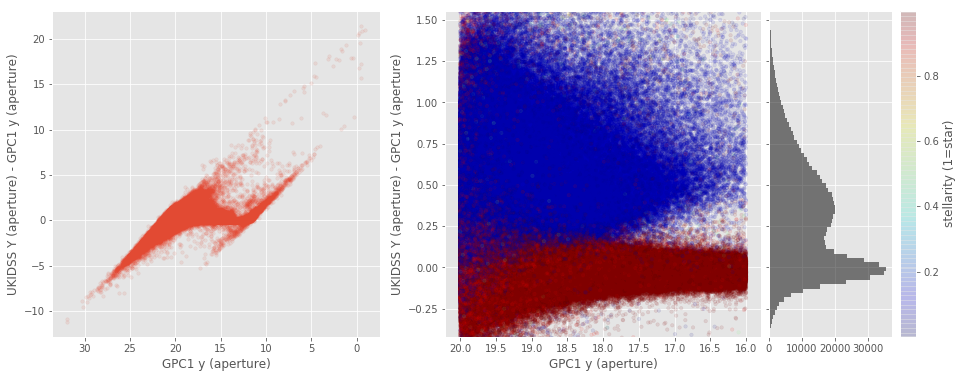

In [18]:
for band_of_a_kind in all_bands:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):

        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
       
        if (basecol1 == "gpc1_g" and basecol2 == "bass_g"):
            savefig = True
        else:
            savefig = False
        
        # Aperture mag
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)

        apcor_check(master_catalogue[col1], master_catalogue[col2], master_catalogue['stellarity'],
                 labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)), savefig=savefig)

for j in range(40):
    plt.close() 